<a href="https://colab.research.google.com/github/josephalanis/math_modeling/blob/main/HW_5_Math_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

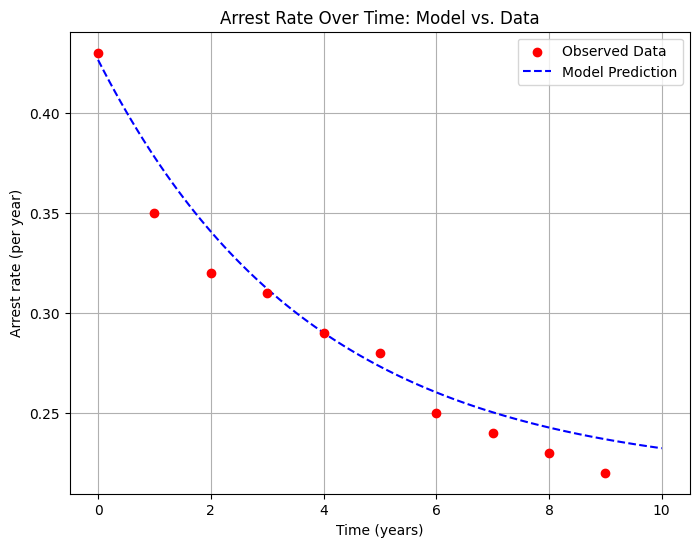

Computed omega: 0.1347 year^(-1)
Computed sigma: 0.2491


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Given data points
t_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a_data = np.array([0.43, 0.35, 0.32, 0.31, 0.29, 0.28, 0.25, 0.24, 0.23, 0.22])

# Given parameters
r0 = 0.82
alpha = 0.52

# Using previous result for sigma/omega
sigma_omega_ratio = 1.8495
#sigma_omega_ratio = 0.38

# Function to solve for omega and sigma using the equation a(4) = 0.29
def equations(vars):
    omega, sigma = vars
    eq1 = sigma - sigma_omega_ratio * omega  # Enforcing sigma/omega ratio

    # Equation for a(4) using the model
    a4_model = (alpha * omega * r0) / (omega + alpha * sigma) + \
               alpha * (r0 - (omega * r0) / (omega + alpha * sigma)) * np.exp(-4 * (omega + alpha * sigma))

    eq2 = a4_model - 0.29  # Ensuring the model matches a(4) = 0.29

    return [eq1, eq2]

# Initial guess for omega and sigma
initial_guess = [0.1, 0.1]
omega, sigma = fsolve(equations, initial_guess)

# Generate model predictions using computed omega and sigma
t_model = np.linspace(0, 10, 100)
a_model = (alpha * omega * r0) / (omega + alpha * sigma) + \
          alpha * (r0 - (omega * r0) / (omega + alpha * sigma)) * np.exp(- (omega + alpha * sigma) * t_model)

# Plot data and model
plt.figure(figsize=(8,6))
plt.scatter(t_data, a_data, color='red', label="Observed Data", zorder=3)
plt.plot(t_model, a_model, label="Model Prediction", linestyle="--", color='blue', zorder=2)
plt.xlabel("Time (years)")
plt.ylabel("Arrest rate (per year)")
plt.title("Arrest Rate Over Time: Model vs. Data")
plt.legend()
plt.grid(True)
plt.show()

# Display computed values of omega and sigma
print(f"Computed omega: {omega:.4f} year^(-1)")
print(f"Computed sigma: {sigma:.4f}")
